In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load dataset
df = pd.read_csv("dataset-of-10s.csv")

# 2. Xóa các cột không cần thiết (text, id, uri...)
X = df.drop(columns=["track", "artist", "uri", "target"])
y = df["target"]

# 3. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Chuẩn hóa dữ liệu cho Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("📌 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, zero_division=0))

# 6. Random Forest (không cần scale)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n📌 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=0))

📌 Logistic Regression
Accuracy: 0.79375
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       640
           1       0.75      0.89      0.81       640

    accuracy                           0.79      1280
   macro avg       0.80      0.79      0.79      1280
weighted avg       0.80      0.79      0.79      1280


📌 Random Forest
Accuracy: 0.84375
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       640
           1       0.82      0.89      0.85       640

    accuracy                           0.84      1280
   macro avg       0.85      0.84      0.84      1280
weighted avg       0.85      0.84      0.84      1280



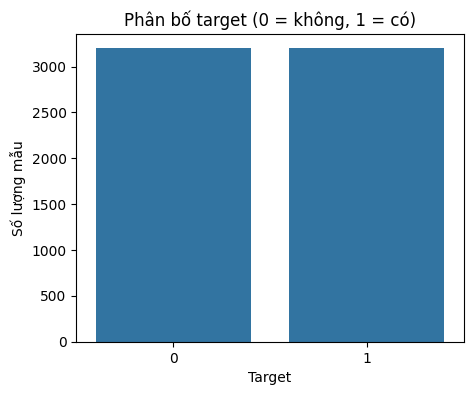

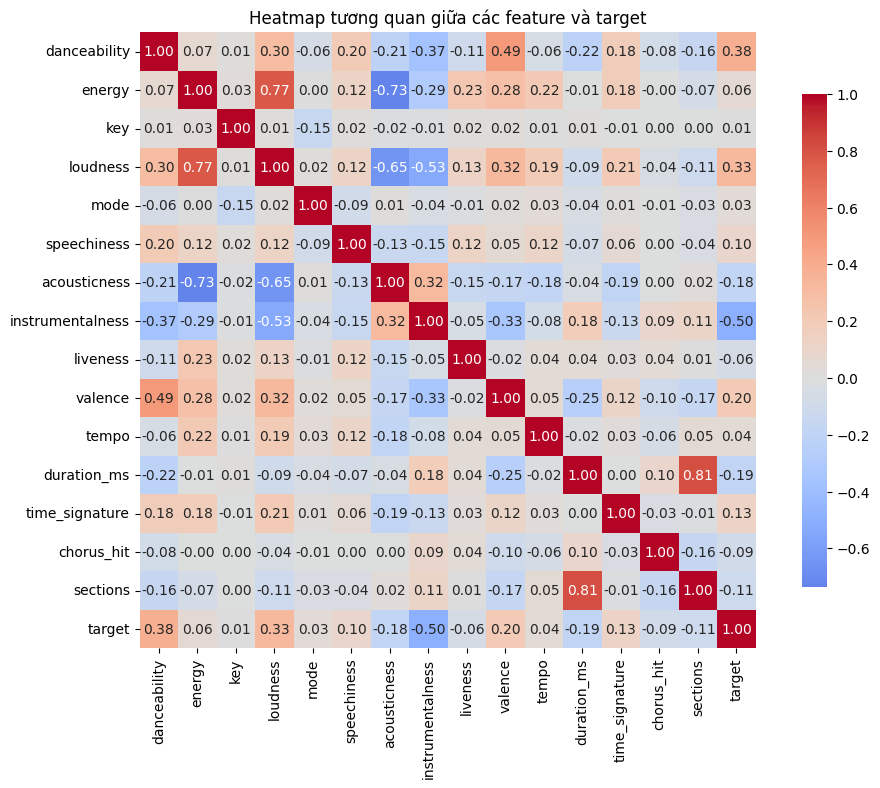

C:\Users\Admin\AppData\Local\Temp\ipykernel_14668\402726040.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


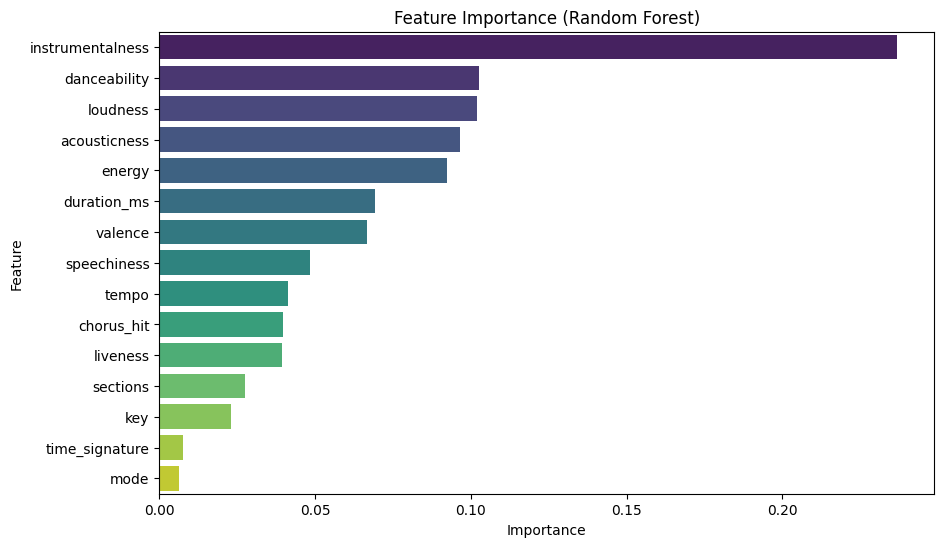

C:\Users\Admin\AppData\Local\Temp\ipykernel_14668\402726040.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[col], palette="Set2")


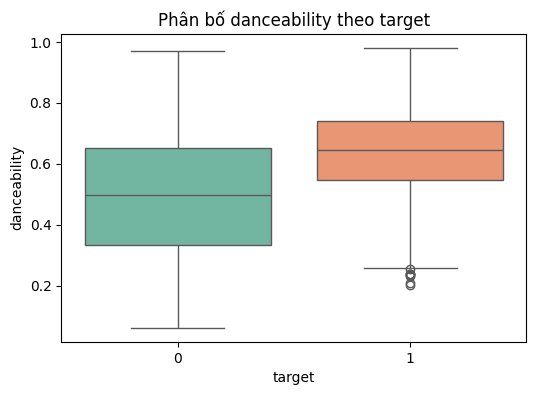

C:\Users\Admin\AppData\Local\Temp\ipykernel_14668\402726040.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[col], palette="Set2")


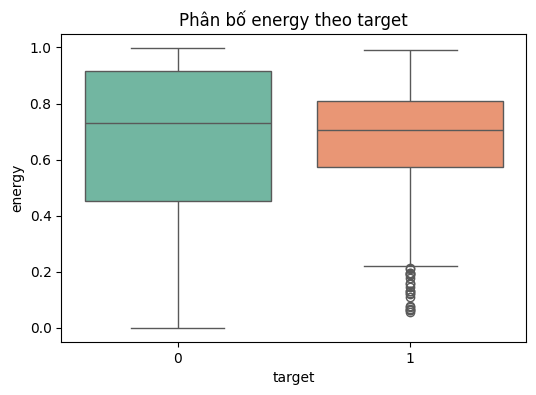

C:\Users\Admin\AppData\Local\Temp\ipykernel_14668\402726040.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[col], palette="Set2")


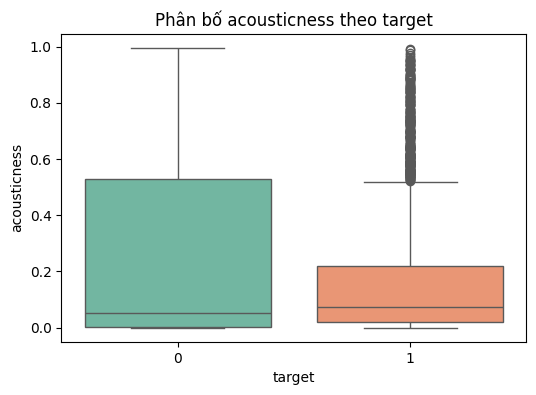

C:\Users\Admin\AppData\Local\Temp\ipykernel_14668\402726040.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[col], palette="Set2")


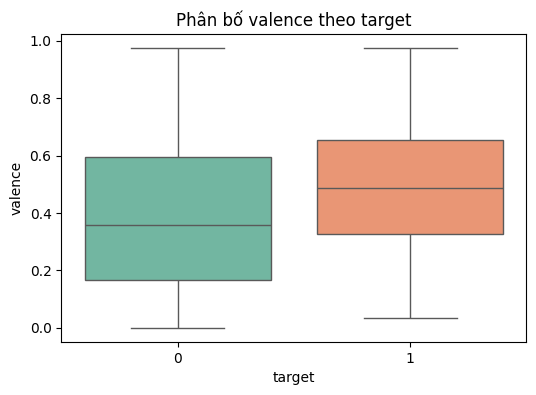

C:\Users\Admin\AppData\Local\Temp\ipykernel_14668\402726040.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[col], palette="Set2")


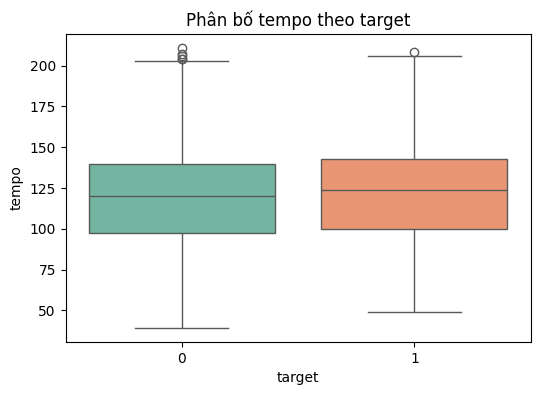

C:\Users\Admin\AppData\Local\Temp\ipykernel_14668\402726040.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[col], palette="Set2")


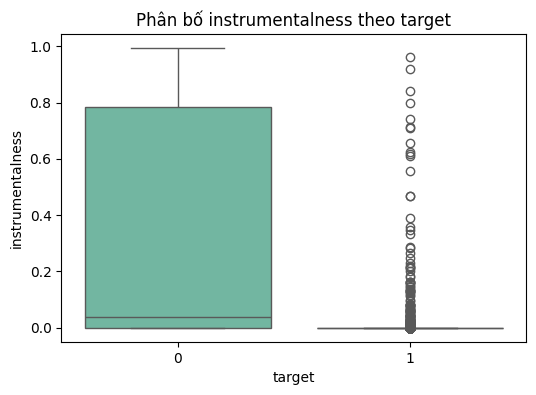

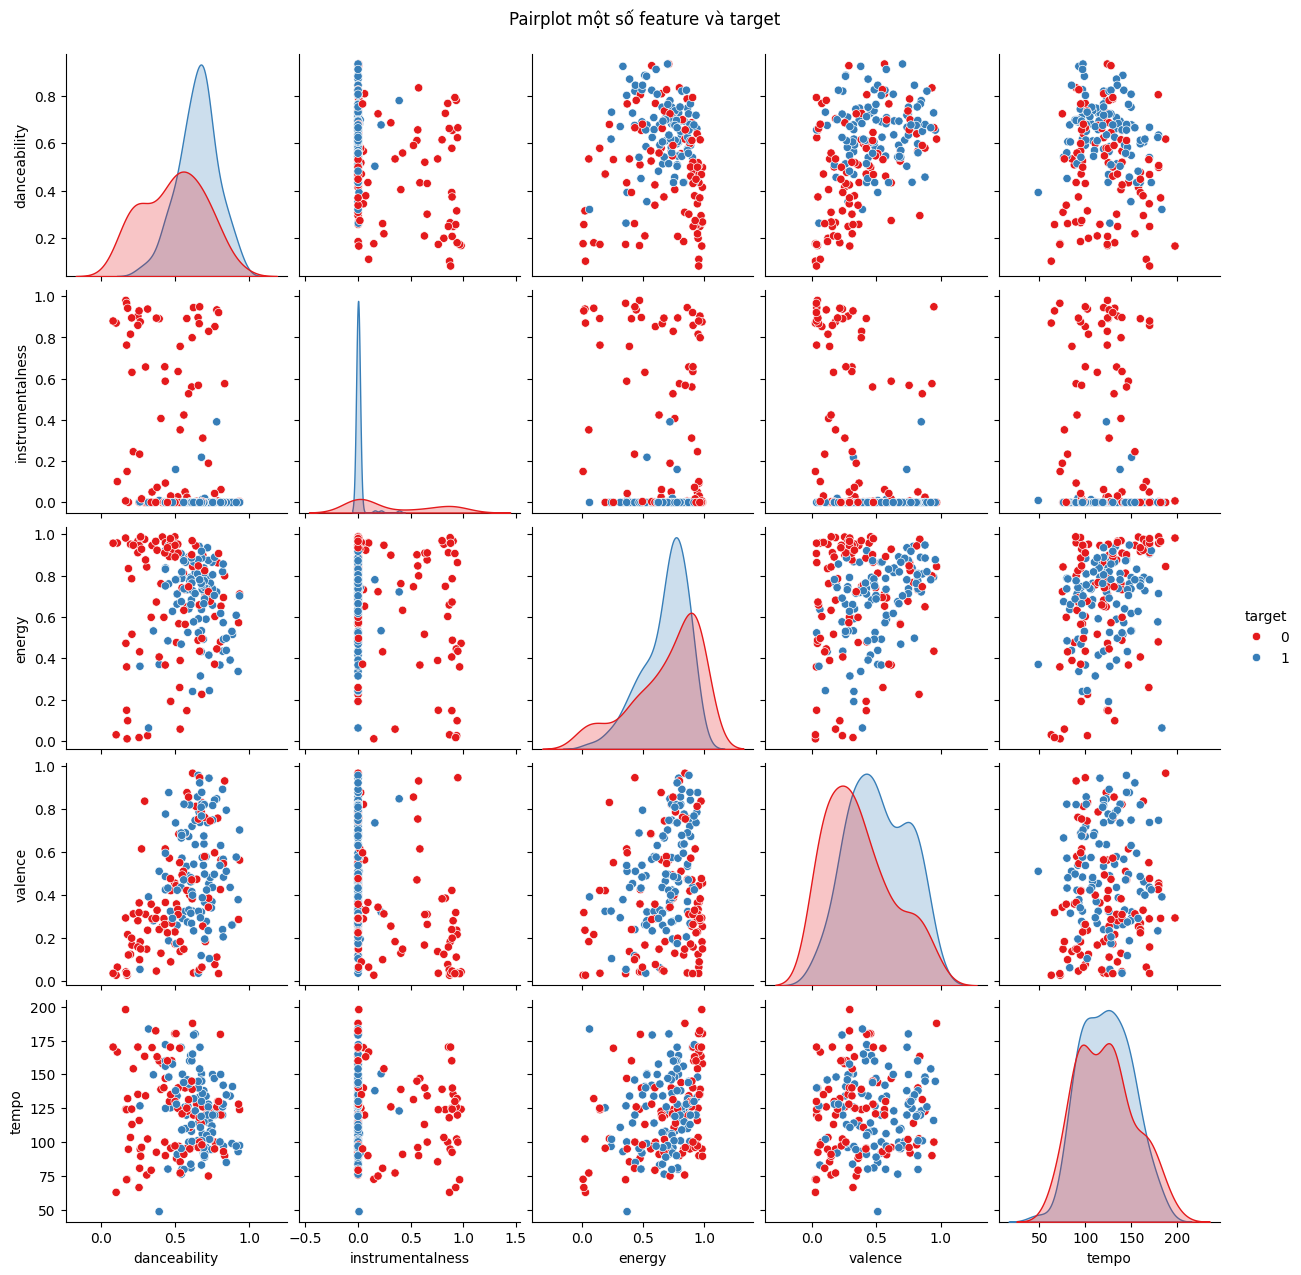

In [3]:
# Giữ lại feature số + target
X = df.drop(columns=["track", "artist", "uri", "target"])
y = df["target"]

# 2. Train Random Forest
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# =======================================
# 📊 Visualization
# =======================================

# A. Phân bố target
plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Phân bố target (0 = không, 1 = có)")
plt.xlabel("Target")
plt.ylabel("Số lượng mẫu")
plt.show()

# B. Heatmap tương quan giữa feature và target
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title("Heatmap tương quan giữa các feature và target")
plt.show()

# C. Feature Importance từ Random Forest
importances = rf.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

# D. Phân bố từng feature theo target (boxplot/histogram)
for col in ["danceability", "energy", "acousticness", "valence", "tempo", "instrumentalness"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y, y=df[col], palette="Set2")
    plt.title(f"Phân bố {col} theo target")
    plt.show()

# E. Pairplot để xem quan hệ nhiều chiều (sample nhỏ để không nặng)
sample_df = df.sample(200, random_state=42) if len(df) > 200 else df
sns.pairplot(sample_df[["danceability","instrumentalness","energy","valence","tempo","target"]],
             hue="target", diag_kind="kde", palette="Set1")
plt.suptitle("Pairplot một số feature và target", y=1.02)
plt.show()